BEST CODE WITH ALL FEATURES

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,32 mins 56 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_milen_09kgx4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.997 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
00:14:36.929: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de validação: 16.5244
ModelMetricsRegression: stackedensemble
** Reported on test data. **

MSE: 273.0565494634064
RMSE: 16.524422817859822
MAE: 9.932534801492972
RMSLE: 0.03930621672870586
Mean Residual Deviance: 273.0565494634064


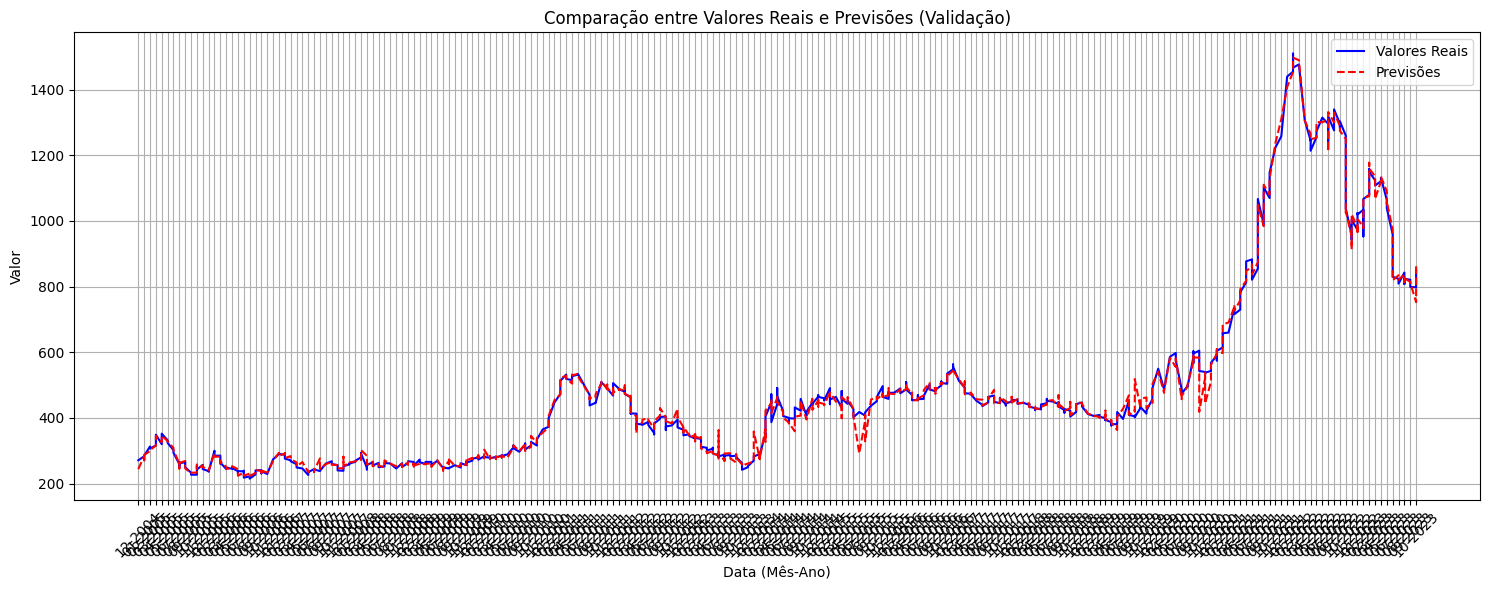

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_a39c0931d6230610fef4cea247b747bd failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
	at hex.Model.adaptTestForTrain(Model.java:1829)
	at hex.Model.adaptTestForTrain(Model.java:1631)
	at hex.Model.adaptTestForTrain(Model.java:1627)
	at hex.Model.adaptFrameForScore(Model.java:1969)
	at hex.Model.score(Model.java:1987)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:555)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1689)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [4]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, leaderboard_frame=valid)

# 6. Previsões (somente no conjunto de validação)
predictions_valid = aml.predict(valid)

# 7. Avaliação do modelo (no conjunto de validação)
performance_valid = aml.leader.model_performance(valid)
rmse_valid = performance_valid.rmse()
print(f"RMSE no conjunto de validação: {rmse_valid:.4f}")
print(performance_valid)

# 8. Combinação das previsões com os valores reais (somente no conjunto de validação)
valid_with_predictions = valid.cbind(predictions_valid)
actual_vs_predicted_valid = valid_with_predictions[["Data", y, "predict"]]
df_actual_vs_predicted_valid = actual_vs_predicted_valid.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted_valid['Data'] = pd.to_datetime(df_actual_vs_predicted_valid['Data'], unit='ms')
df_actual_vs_predicted_valid['Mes_Ano'] = df_actual_vs_predicted_valid['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais (somente no conjunto de validação)
dates = df_actual_vs_predicted_valid["Mes_Ano"].values
real_values = df_actual_vs_predicted_valid[y].values
predicted_values = df_actual_vs_predicted_valid["predict"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões (Validação)")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,47 mins 39 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_milen_09kgx4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.001 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
00:29:17.165: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de validação: 17.7941
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 316.6300686045252
RMSE: 17.794102073567107
MAE: 11.105321120455688
RMSLE: 0.038839154742602584
Mean Residual Deviance: 316.6300686045252
R^2: 0.9963857233090946
Null degrees of freedom: 668
Residual degrees of freedom: 663
Null deviance: 58844356.962547824
Residual deviance: 211825.51589642736
AIC: 5764.46388131257


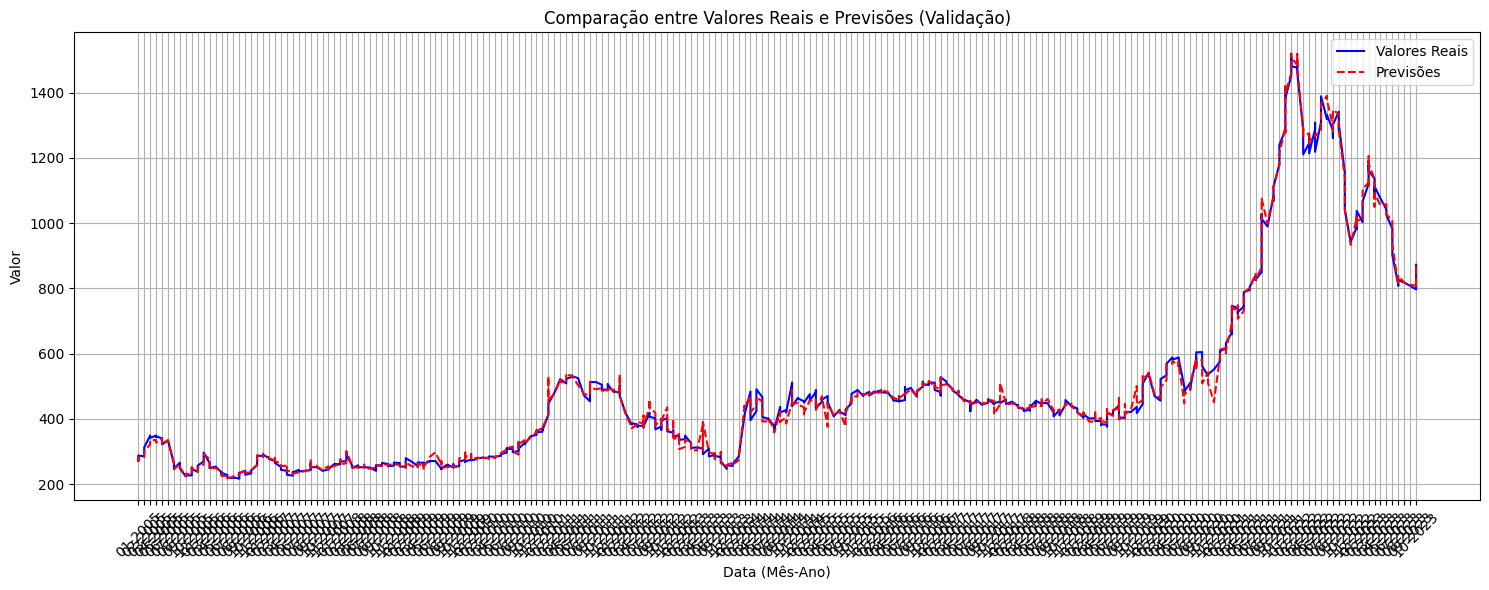

In [5]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# Inicialização do H2O
h2o.init()

# Carrega os dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# Divisão dos dados em treino, validação e teste
train, valid, test = frame.split_frame(ratios=[.7, .15])

# Define a coluna alvo e as características
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")  # Presumindo que 'Data' é uma coluna no seu dataset

# Cria e treina o modelo AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, leaderboard_frame=valid)

# Realiza previsões no conjunto de validação
predictions_valid = aml.predict(valid)

# Avaliação do modelo no conjunto de validação
performance_valid = aml.leader.model_performance(valid)
rmse_valid = performance_valid.rmse()
print(f"RMSE no conjunto de validação: {rmse_valid:.4f}")
print(performance_valid)

# Combina as previsões com os valores reais no conjunto de validação
valid_with_predictions = valid.cbind(predictions_valid)
actual_vs_predicted_valid = valid_with_predictions[["Data", y, "predict"]]
df_actual_vs_predicted_valid = actual_vs_predicted_valid.as_data_frame()

# Processa a coluna de datas
df_actual_vs_predicted_valid['Data'] = pd.to_datetime(df_actual_vs_predicted_valid['Data'], unit='ms')
df_actual_vs_predicted_valid['Mes_Ano'] = df_actual_vs_predicted_valid['Data'].dt.strftime('%m-%Y')

# Visualização das previsões vs valores reais no conjunto de validação
dates = df_actual_vs_predicted_valid["Mes_Ano"].values
real_values = df_actual_vs_predicted_valid[y].values
predicted_values = df_actual_vs_predicted_valid["predict"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões (Validação)")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Ajusta layout para não sobrepor elementos
plt.show()

# Salvando o modelo
#model_path = h2o.save_model(model=aml.leader, path="/my_model_path", force=True)

# Para carregar o modelo, você pode usar:
# loaded_model = h2o.load_model(path=model_path)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.391-b13, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmpb4kd__1v
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmpb4kd__1v\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmpb4kd__1v\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_milen_09kgx4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.480 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:41:11.230: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:41:11.235: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 21.8798
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 478.7263557686353
RMSE: 21.8798161730997
MAE: 12.394674668312659
RMSLE: 0.04695354593462158
Mean Residual Deviance: 478.7263557686353
R^2: 0.9942448283545884
Null degrees of freedom: 727
Residual degrees of freedom: 722
Null deviance: 60564941.99019882
Residual devia

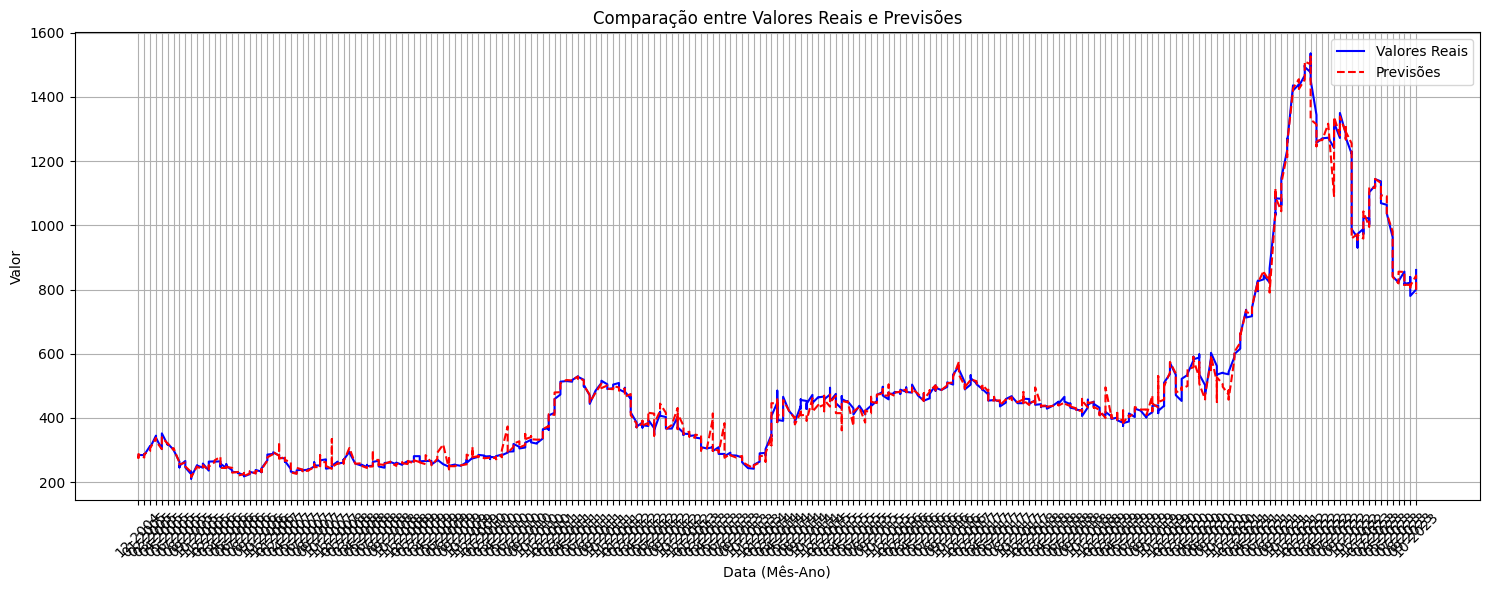

In [1]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


In [15]:
# Inicialização do H2O
h2o.init()

# Carregue seus dados
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# Converta a coluna 'Data' para string se ainda não for
frame['Data'] = frame['Data'].ascharacter()  # Isso irá converter a coluna 'Data' para string

# Em seguida, converta a coluna 'Data' de string para o tipo de data do H2O
frame['Data'] = frame['Data'].as_date("%Y-%m-%d")  # Ajuste o formato conforme necessário

# Agora que 'Data' é do tipo date, prossiga com as etapas subsequentes

# ... (resto do código segue a partir daqui)



AttributeError: module 'h2o' has no attribute 'init'

Base sem URAMA

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 15 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_y17qys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.367 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
02:00:45.901: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
02:00:45.902: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 62.2841
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3879.303724990841
RMSE: 62.28405674802213
MAE: 41.25246471136718
RMSLE: 0.1587921751267113
Mean Residual Deviance: 3879.303724990841
R^2: 0.9501477159696303
Null degrees of freedom: 664
Residual degrees of freedom: 656
Null deviance: 51749839.65049533
Residual devian

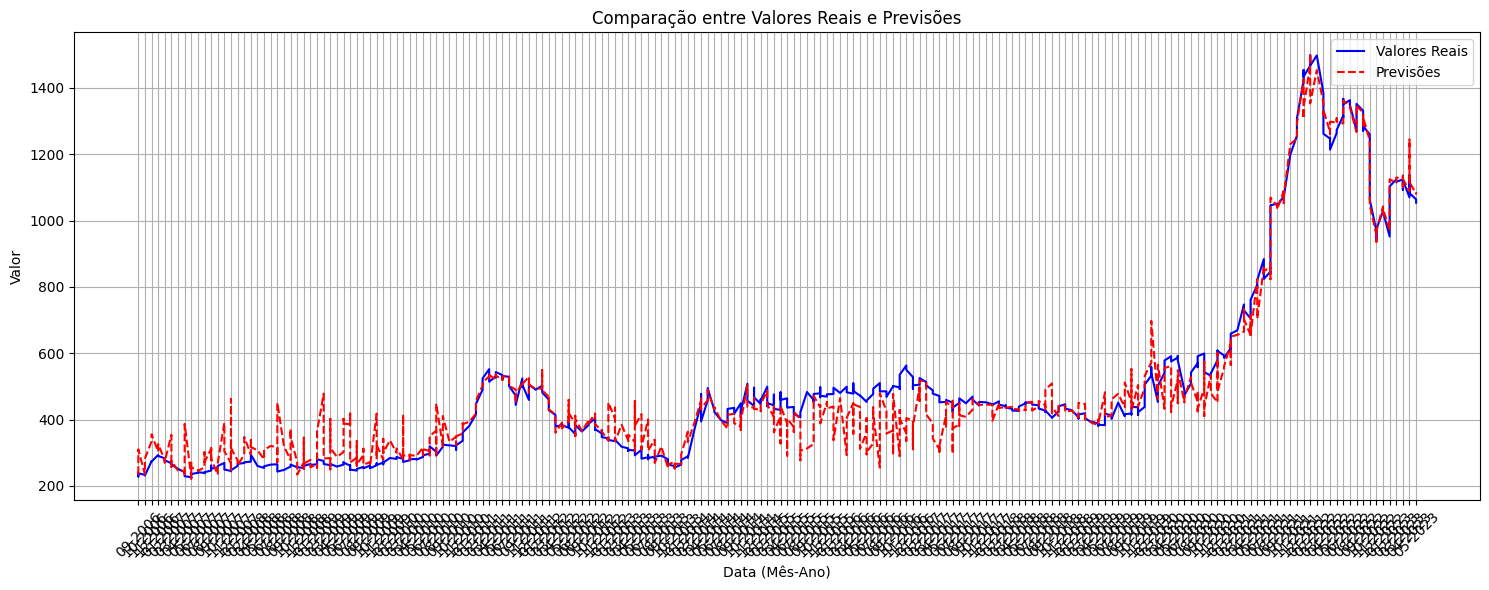

In [9]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMA.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


SEM URAMI

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmpxoxn43re\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_y17qys
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:44:54.161: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:44:54.179: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

23:49:55.388: GBM_lr_annealing_selection_AutoML_1_20231028_234454 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 56.1148
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3148.8762492322735
RMSE: 56.114848741062055
MAE: 37.76733888

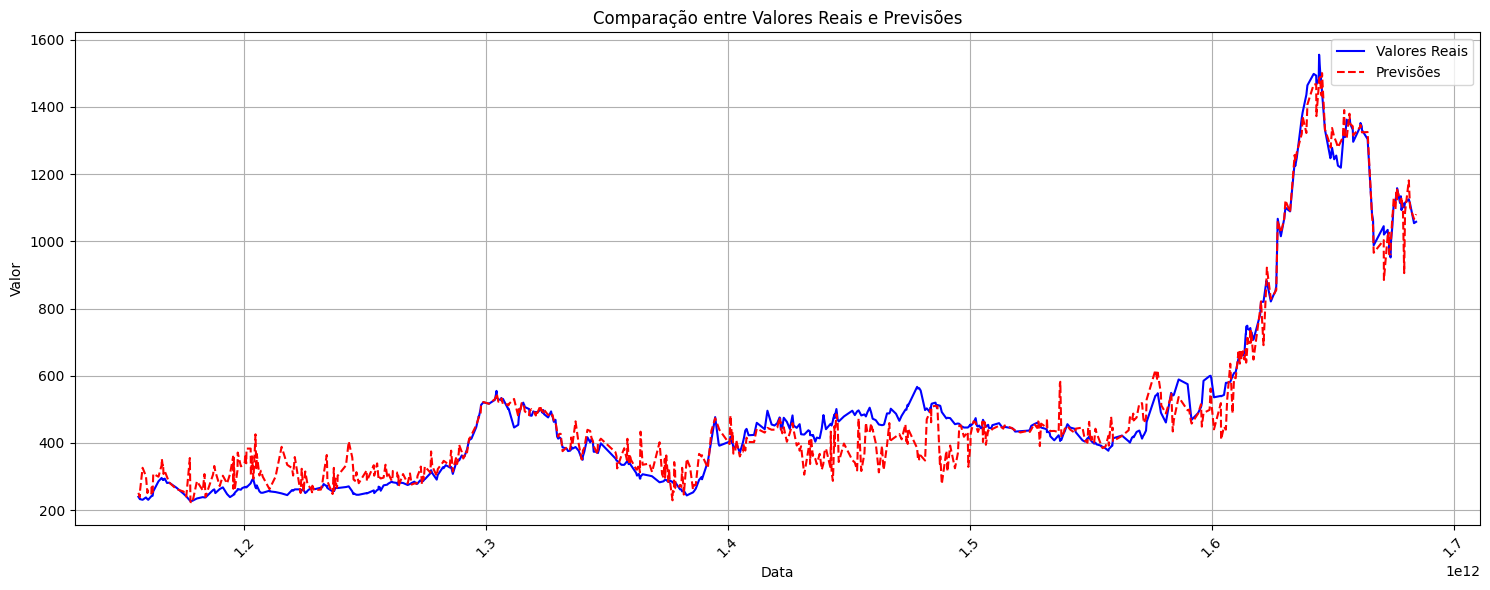

In [1]:
# 1. Instalação e Importação
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAMI.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()
print(df_actual_vs_predicted.head())

# 9. Visualização das previsões vs valores reais
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

# Extracting the "Data" column from the test set
dates = test["Data"].as_data_frame().values

# Visualização das previsões vs valores reais
plt.figure(figsize=(15, 6))

# Use 'dates' for the x-axis
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")

plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if they overlap
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()



SEM URADI

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmp4ej_qyke\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 9 days !!!"
H2O_cluster_name:,H2O_from_python_milen_06sgun
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:57:17.432: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:57:17.447: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

14:02:17.341: GBM_lr_annealing_selection_AutoML_1_20231029_135717 [GBM lr_annealing] failed: water.exceptions.H2OIllegalArgumentException: Can only convert jobs producing a single Model or ModelContainer.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 54.7006
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2992.155537114721
RMSE: 54.70059905626922
MAE: 36.0724259749

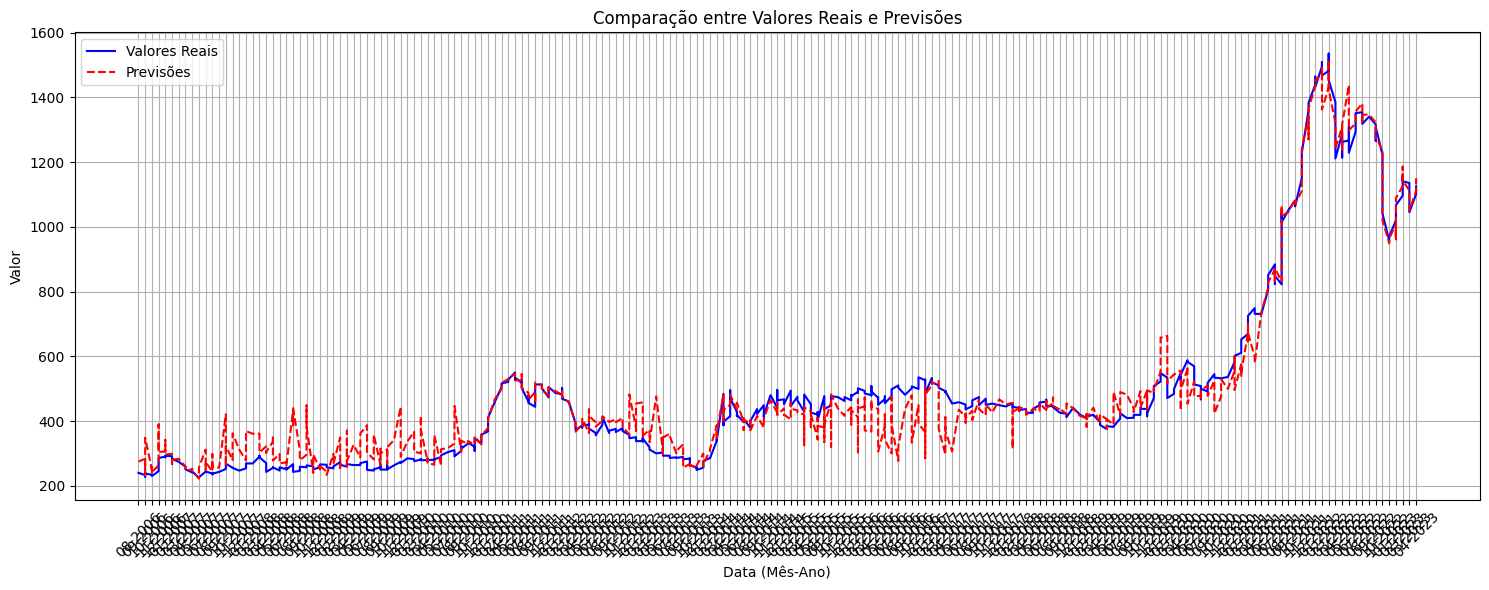

In [1]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_URAD.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


SEM TMI


In [7]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [13]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/weater_base.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


ImportError: cannot import name 'H2OTableDisplay' from 'h2o.display' (c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\display.py)

SEM TME


In [3]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_TME.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,17 mins 31 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 10 days !!!"
H2O_cluster_name:,H2O_from_python_milen_06sgun
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.438 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
14:15:16.424: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:15:16.425: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████

SEM TPO

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmpxmvwo8kb
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmpxmvwo8kb\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmpxmvwo8kb\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 10 days !!!"
H2O_cluster_name:,H2O_from_python_milen_355qnh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
22:21:43.712: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:21:43.730: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 57.1570
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 3266.9188101911827
RMSE: 57.156966418724345
MAE: 39.204813969237634
RMSLE: 0.14266186020529856
Mean Residual Deviance: 3266.9188101911827
R^2: 0.9571431584586455
Null degrees of freedom: 656
Residual degrees of freedom: 647
Null deviance: 50086970.70104514
Residual d

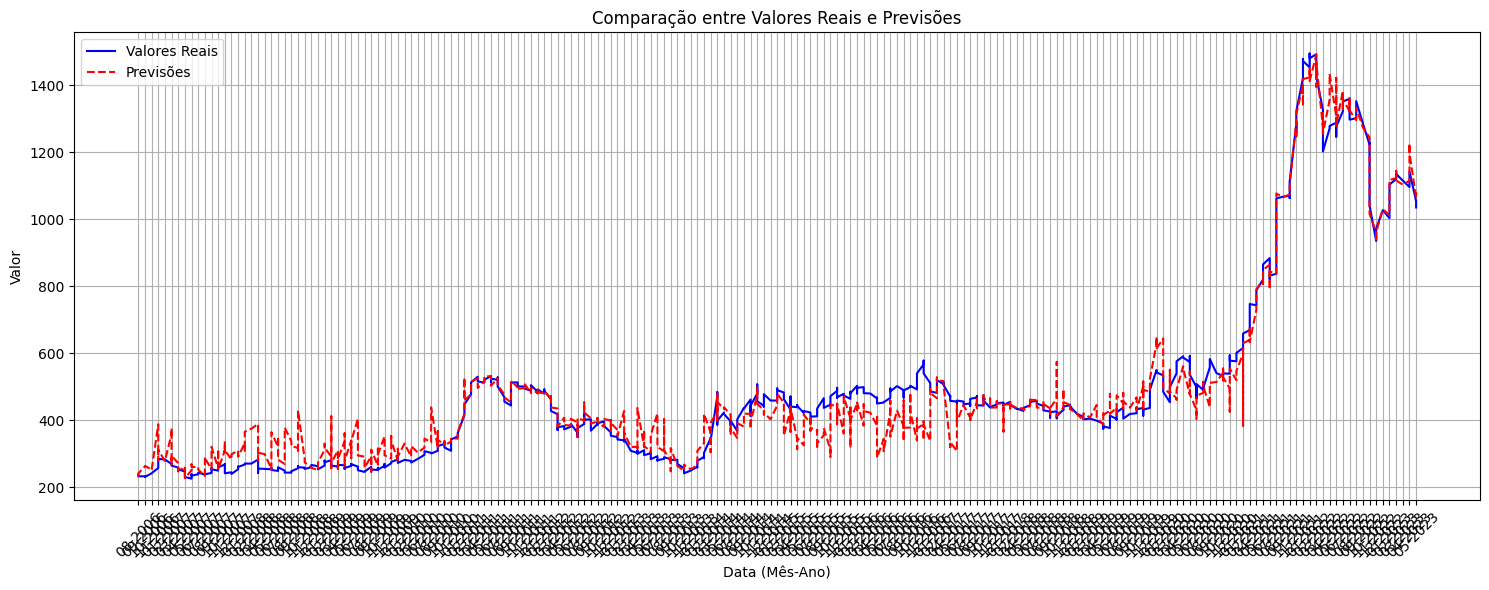

In [1]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_TPO.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


SEM PRECO DOLAR

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 49 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 10 days !!!"
H2O_cluster_name:,H2O_from_python_milen_355qnh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.543 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
22:32:59.845: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:32:59.845: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE no conjunto de teste: 169.4271
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 28705.548433572843
RMSE: 169.42711835350573
MAE: 113.53034543066732
RMSLE: 0.2883546360003355
Mean Residual Deviance: 28705.548433572843
R^2: 0.6444420177356067
Null degrees of freedom: 642
Residual degrees of freedom: 626
Null deviance: 51912530.27175045
Residual d

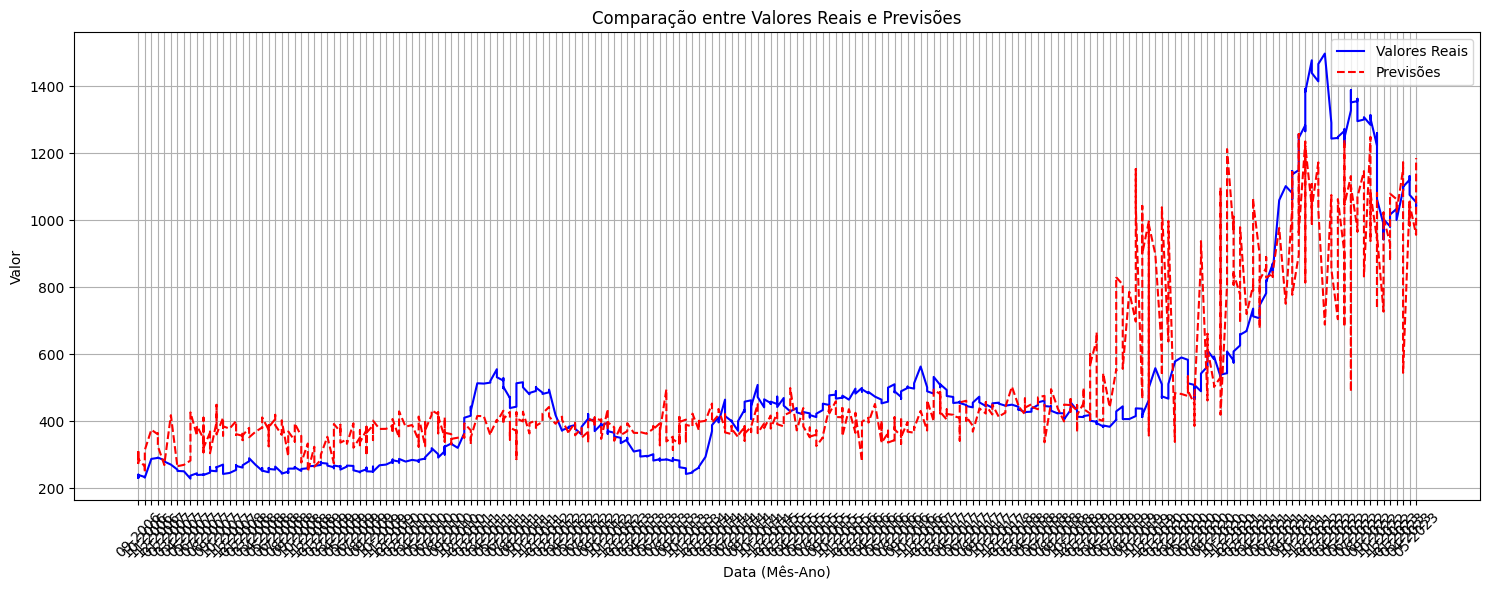

In [2]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Instalação e Importação
# (Já fornecido)

# 2. Inicialização do H2O
h2o.init()

# 3. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_PRECO_DOLAR.csv'
frame = h2o.import_file(path_to_csv)

# 4. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões
predictions = aml.predict(test)

# 7. Avaliação do modelo
performance = aml.leader.model_performance(test)
rmse = performance.rmse()
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
test["predictions"] = predictions
actual_vs_predicted = test[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,23 mins 25 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 10 days !!!"
H2O_cluster_name:,H2O_from_python_milen_355qnh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.360 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
22:45:57.563: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:45:57.564: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RMSE nos últimos 3 meses de dados: 92.5784
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 8570.753049734116
RMSE: 92.57836167125727
MAE: 65.86197131902222
RMSL

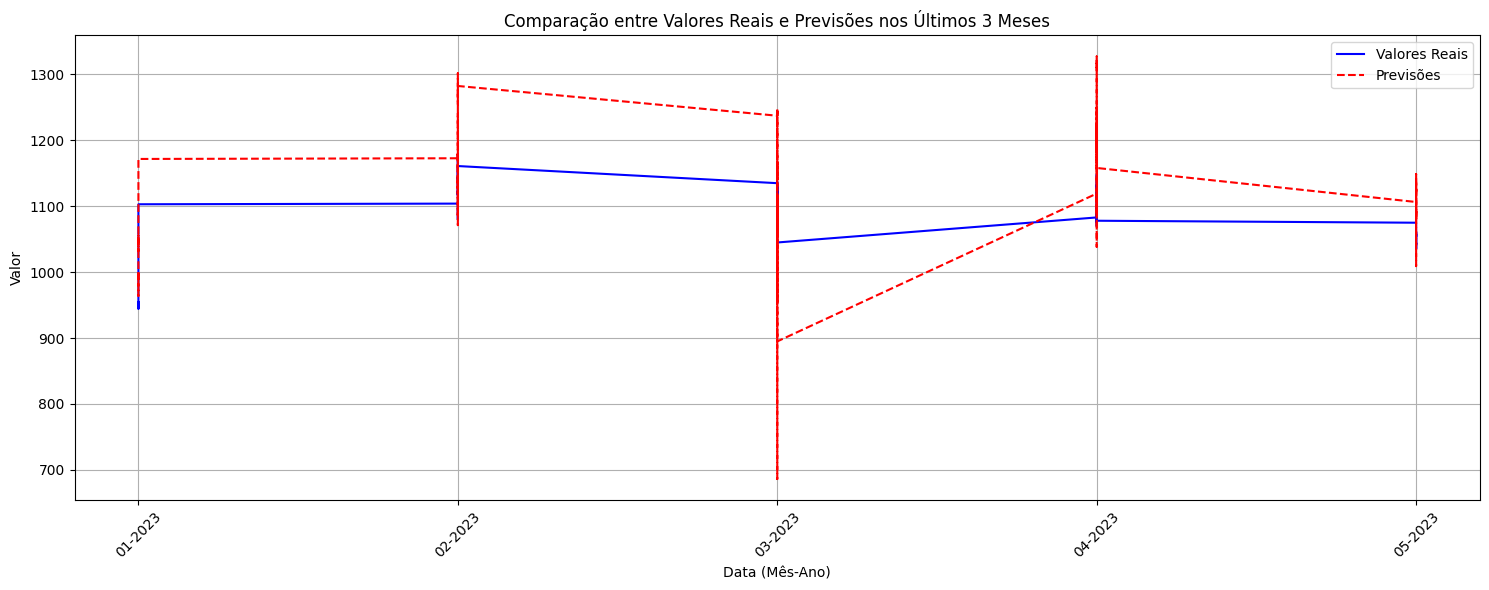

In [4]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

from h2o.automl import H2OAutoML

# 1. Inicialização do H2O
h2o.init()

# 2. Carregue seus dados diretamente de um arquivo CSV para um H2OFrame
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/base3.csv'
frame = h2o.import_file(path_to_csv)

# 3. Separe os últimos 3 meses de dados
frame_df = frame.as_data_frame()
frame_df['Data'] = pd.to_datetime(frame_df['Data'], unit='ms')
last_three_months_data = frame_df.sort_values(by="Data").tail(90) # Ajuste este número se não for diário
last_three_months_data_h2o = h2o.H2OFrame(last_three_months_data)

# Atualize o frame para excluir os últimos 3 meses de dados
frame_df = frame_df.drop(last_three_months_data.index)
frame = h2o.H2OFrame(frame_df)

# 4. Divisão dos dados
train, valid, _ = frame.split_frame(ratios=[.7, .15])

# 5. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=300, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 6. Previsões nos últimos 3 meses de dados
predictions = aml.predict(last_three_months_data_h2o)

# 7. Avaliação do modelo nos últimos 3 meses
performance = aml.leader.model_performance(last_three_months_data_h2o)
rmse = performance.rmse()
print(f"RMSE nos últimos 3 meses de dados: {rmse:.4f}")
print(performance)

# 8. Combinação das previsões com os valores reais
last_three_months_data_h2o["predictions"] = predictions
actual_vs_predicted = last_three_months_data_h2o[["Data", "Preco_Real", "predictions"]]
df_actual_vs_predicted = actual_vs_predicted.as_data_frame()

# Processar a coluna de datas
df_actual_vs_predicted['Data'] = pd.to_datetime(df_actual_vs_predicted['Data'], unit='ms')
df_actual_vs_predicted['Mes_Ano'] = df_actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 9. Visualização das previsões vs valores reais
dates = df_actual_vs_predicted["Mes_Ano"].values
real_values = df_actual_vs_predicted["Preco_Real"].values
predicted_values = df_actual_vs_predicted["predictions"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões nos Últimos 3 Meses")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização
plt.tight_layout()  # Garante que as datas não fiquem sobrepostas
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 26 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 10 days !!!"
H2O_cluster_name:,H2O_from_python_milen_355qnh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.551 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
23:48:38.268: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:48:38.269: AutoML: XGBoost is not available; skipping it.

█████████████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.3366964925324234
RMSE: 0.5802555407166944
MAE: 0.1646712322368669
RMSLE: 0.0007293271415358079
Mean Residual Deviance: 0.3366964925324234
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


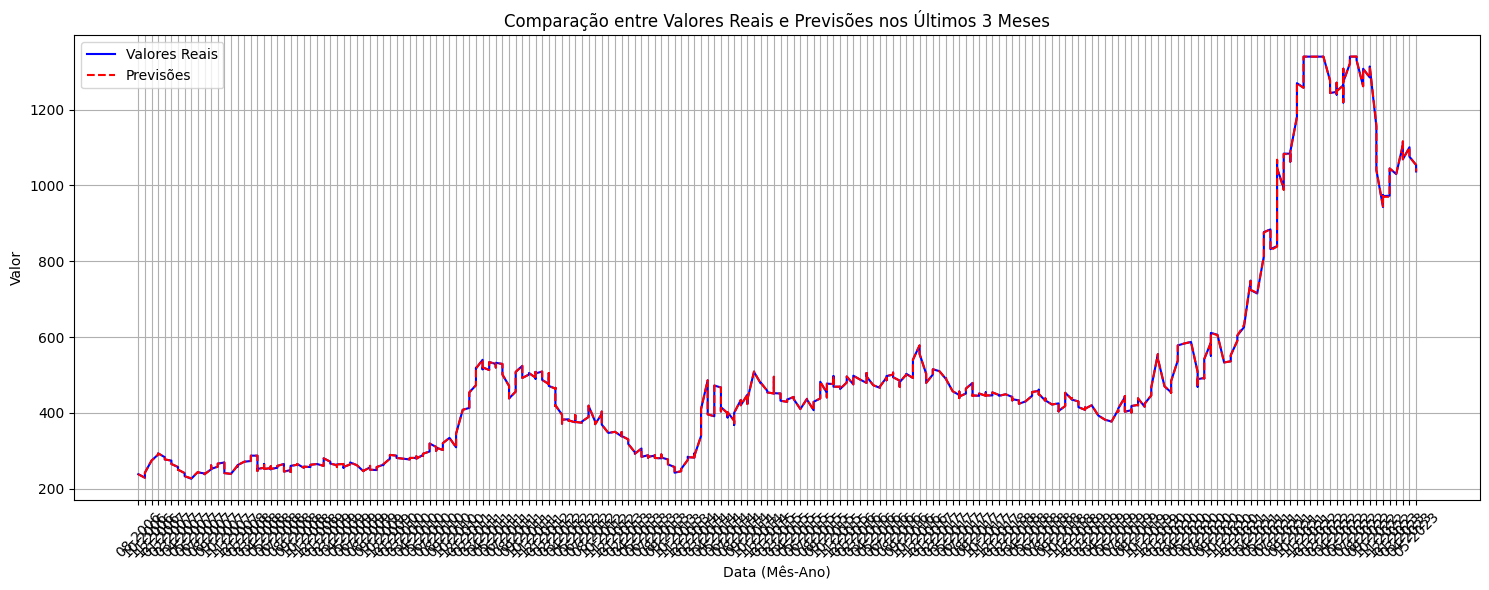

In [6]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# 1. Inicialização do H2O com mais memória
h2o.init(max_mem_size="8G")  

# 2. Importação dos dados
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_PRECO_DOLAR.csv'
frame = h2o.import_file(path_to_csv)

# 3. Converta o frame H2O em um DataFrame do Pandas
df = frame.as_data_frame()

# 4. Engenharia de Características
df['Preco_Real_Squared'] = df['Preco_Real']**2

# 5. Tratamento de Outliers
mean_preco = df['Preco_Real'].mean()
std_preco = df['Preco_Real'].std()
df['Preco_Real'] = np.clip(df['Preco_Real'], mean_preco - 3*std_preco, mean_preco + 3*std_preco)

# 6. Converta de volta para H2OFrame
frame = h2o.H2OFrame(df)

# 7. Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# 8. Construção do modelo
y = "Preco_Real"
x = frame.columns
x.remove(y)
x.remove("Data")

aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# 9. Avaliação
performance = aml.leader.model_performance(test)
print(performance)

# 10. Previsões
predictions = aml.leader.predict(test)

# Tentativa de resolver o erro H2OServerError
try:
    actual_vs_predicted = test.cbind(predictions).as_data_frame()
except H2OServerError:
    h2o.remove_all()  
    h2o.gc()
    actual_vs_predicted = test.cbind(predictions).as_data_frame()

# 11. Processar a coluna de datas
actual_vs_predicted['Data'] = pd.to_datetime(actual_vs_predicted['Data'], unit='ms')
actual_vs_predicted['Mes_Ano'] = actual_vs_predicted['Data'].dt.strftime('%m-%Y')

# 12. Visualização
dates = actual_vs_predicted["Mes_Ano"].values
real_values = actual_vs_predicted["Preco_Real"].values
predicted_values = actual_vs_predicted["predict"].values

plt.figure(figsize=(15, 6))
plt.plot(dates, real_values, label="Valores Reais", color="blue")
plt.plot(dates, predicted_values, label="Previsões", color="red", linestyle="--")
plt.title("Comparação entre Valores Reais e Previsões nos Últimos 3 Meses")
plt.xlabel("Data (Mês-Ano)")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-40648 (build 11.0.16.1+1-LTS, mixed mode)
  Starting server from C:\Users\milen\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\milen\AppData\Local\Temp\tmp8q4y6o5i
  JVM stdout: C:\Users\milen\AppData\Local\Temp\tmp8q4y6o5i\h2o_milen_started_from_python.out
  JVM stderr: C:\Users\milen\AppData\Local\Temp\tmp8q4y6o5i\h2o_milen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,"1 year, 1 month and 11 days !!!"
H2O_cluster_name:,H2O_from_python_milen_zloy8g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.924 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:07:26.936: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:07:26.946: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.0134139737463166
RMSE: 1.006684644636202
MAE: 0.1595888010465908
RMSLE: 0.001168228871851818
Mean Residual Deviance: 1.0134139737463166
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (

c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'TPO': substituting in a column of NaN
  warnings.warn(w)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'TMA': substituting in a column of NaN
  warnings.warn(w)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'TME': substituting in a column of NaN
  warnings.warn(w)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'TMI': substituting in a column of NaN
  warnings.warn(w)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset is missing column 'URAD': substituting in a column of NaN
  warnings.wa

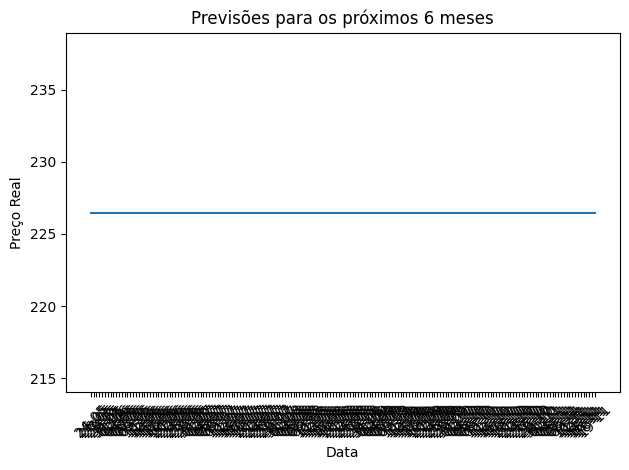

In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# Inicialização do H2O
h2o.init()

# Carregar dados
path_to_csv = 'C:/Users/milen/OneDrive/Documentos/TCC/Bases/SEM_PRECO_DOLAR.csv'
frame = h2o.import_file(path_to_csv)

# Engenharia de características
df = frame.as_data_frame()
df['Preco_Real_Squared'] = df['Preco_Real']**2
mean_preco = df['Preco_Real'].mean()
std_preco = df['Preco_Real'].std()
df['Preco_Real'] = np.clip(df['Preco_Real'], mean_preco - 3*std_preco, mean_preco + 3*std_preco)
frame = h2o.H2OFrame(df)

# Divisão dos dados
train, valid, test = frame.split_frame(ratios=[.7, .15])

# Construção do modelo
y = "Preco_Real"
x = [i for i in frame.columns if i not in [y, "Data"]]
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# Avaliação
performance = aml.leader.model_performance(test)
print(performance)

# Previsões para os próximos 6 meses
df_h2o = frame.as_data_frame()
last_date = pd.to_datetime(df_h2o['Data'], unit='ms').max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=180)
df_future = pd.DataFrame(future_dates, columns=['Data'])
df_future['Preco_Real_Squared'] = 0  # Como exemplo, ajuste conforme necessário

future_frame = h2o.H2OFrame(df_future)

future_predictions = aml.leader.predict(future_frame)
df_future_predictions = future_frame.as_data_frame()
df_future_predictions['Predictions'] = future_predictions.as_data_frame()

df_future_predictions['Data'] = pd.to_datetime(df_future_predictions['Data'], unit='ms')
df_future_predictions['Data'] = df_future_predictions['Data'].dt.strftime('%d-%m')

print(df_future_predictions[['Data', 'Predictions']])

# Para visualização
plt.plot(df_future_predictions['Data'], df_future_predictions['Predictions'])
plt.xticks(rotation=45)
plt.title("Previsões para os próximos 6 meses")
plt.ylabel("Preço Real")
plt.xlabel("Data")
plt.tight_layout()
plt.show()
